In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interpolate
from numpy.linalg import solve
from scipy.integrate import quad
import math



In [6]:
shape_pts=np.array([(-8,1),(-6,10),(-5,-7),(0,-5),(1,9),(2,-8),(3,28),(5,-23),(7,12),(9,1),(10,10),(12,15),(14,18),(15,10)])

x = shape_pts[:,0]
y = shape_pts[:,1]

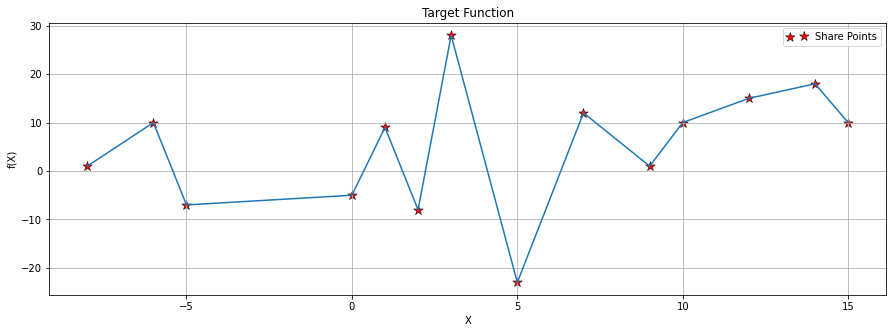

In [7]:
'''Generate the target function f'''

%matplotlib inline
def TargetFunction(x,y,markersize):
    f = plt.figure()
    f.set_figwidth(15)
    f.set_figheight(5)
    plt.plot(x,y)
    p1=plt.scatter(x,y,marker = '*',s=markersize,edgecolors = 'black', linewidth=.5,c = 'red')
    plt.legend([p1],['Share Points'],scatterpoints=2,loc ="upper right")
    plt.xlabel('X')
    plt.ylabel('f(X)')
    plt.title('Target Function')
    plt.rcParams.update({'font.size': 18})
    plt.grid()
    return plt


f = TargetFunction(x,y,markersize = 100)


\begin{equation*} W_{p,k}(x) = \begin{cases} \sum\limits_p \exp{\Bigl(-\frac{(x-x_p)^2}{2\sigma^2}}\Bigr) \quad\quad \text{for} \quad\quad k = 0 \\ \exp{\Bigl(-\frac{(x-x_p)^2}{2\sigma^2}}\Bigr) \Bigl(\cos\bigl(k\,\kappa\,x + \frac{r\,x^2}{2}\bigr) + \iota\,\sin\bigl(k\,\kappa\,x + \frac{r\,x^2}{2}\bigr)\Bigr) \quad\quad \forall \quad\quad k > 0, \end{cases} \end{equation*}

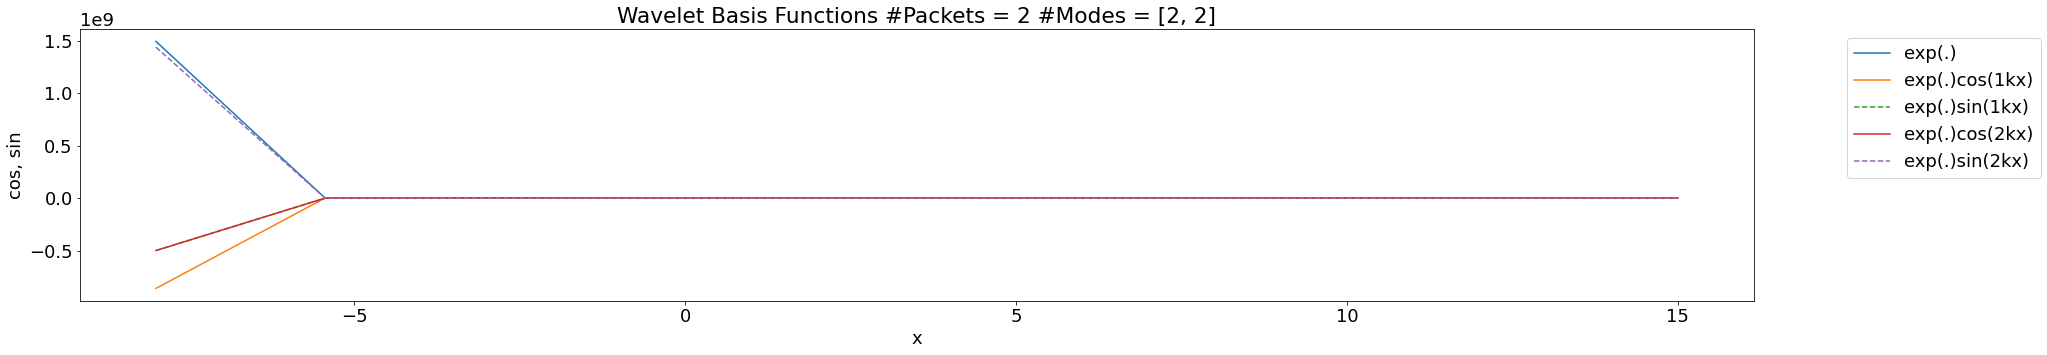

[[ 1.49441401e+09 -8.61799152e+08 -5.00448784e+08 -5.00448784e+08
   1.43899708e+09]
 [ 8.35514072e+05  6.96612936e+04 -8.23898000e+05 -8.23898000e+05
  -2.07046892e+05]
 [ 2.39065099e+03  1.68401949e+03 -1.81410133e+01 -1.81410133e+01
  -1.70957724e+03]
 [ 3.50072630e+01  3.48622224e+01  3.44283025e+01  3.44283025e+01
   3.37090988e+01]
 [ 2.62349179e+00  2.15473258e+00  9.15968492e-01  9.15968492e-01
  -6.50121691e-01]
 [ 1.00619193e+00  2.64107354e-01 -8.67545034e-01 -8.67545034e-01
  -7.19537410e-01]
 [ 1.97497464e+00 -8.27862996e-01 -1.28093318e+00 -1.28093318e+00
   1.90173722e+00]
 [ 1.98390917e+01 -1.79483821e+01  1.26366308e+01  1.26366308e+01
  -4.91628140e+00]
 [ 1.01990946e+03 -9.86151354e+02  8.87111767e+02  8.87111767e+02
  -7.29346944e+02]
 [ 2.68337287e+05 -1.54744833e+05 -8.98606864e+04 -8.98606864e+04
   2.58386612e+05]]


In [16]:
'''Build the basis functions'''

bunch_pts = [2, 3, 6]

N = [2, 3, 4]

sigma = [1, 2, 1]


def WaveletBasis(kappa, bunch_pts, N, sigma, phase_shift, x_min, x_max, m):
    for o in range(len(N)):
        x_new=np.linspace(x_min, x_max, m)
        #Z = np.empty([len(x_new),2*N[o]+1])
        A=np.zeros((len(x_new),2*N[o]+1))
        for l in range(len(bunch_pts)):
            for i in range (len(x_new)):
                for j in range((2*N[o]+1)):
                    num = (x_new[i]-bunch_pts[l])**2
                    den = 2*(sigma[l]**2)
                    points = num/den
                    phase = (phase_shift*(x_new[i]**2))/2
                    if (j==0):
                        A[i,j]=1*np.exp(points)
                    elif (j>0):
                        A[i,j]=np.exp(points)*(np.cos((((j//2)+1)*Kappa*x_new[i])+phase)+np.imag(np.sin((((j//2)+1)*Kappa*x_new[i])+phase)))
            Z = np.hstack(A)
    return np.array(A)




#Plot Wavelet Basis Function
# def WaveletBasis(kappa, bunch_pts, N, sigma, shift, x_min, x_max):
#     x_new = np.linspace(x_min,x_max,5)
#     W=[]
#     for i in range(0,len(bunch_pts)):
#         #z = np.empty((bunch_pts[i], ((2*N[i])+1) ,len(x_new)))
#         w = np.zeros(((2*N[i]+1) ,len(x_new)))
#         for k in range(0,len(x_new)):
#             for K in range(0,((2*N[i])+1)):
#                 if (K==0):
#                     w[i,K]=np.exp((x_new[k]-bunch_pts[i])**2/2*((sigma[i])**2))
#                 elif (K>0):
#                     inpt = K*kappa*x_new[k]
#                     w[i,K]=(np.exp(((x_new[k]-bunch_pts[i])**2)/(2*((sigma[i])**2))))*((np.cos(inpt))+np.imag(np.sin(inpt)))
#         add=np.array([w]*bunch_pts[i])
#         W.append(add)
#     return np.array(W)

    


#Plot Wavelet Basis
def Plot_waveletbasis(function,x_pts):
    f = plt.figure()
    f.set_figwidth(30)
    f.set_figheight(5)
    for i in range(len(function[0])):
        if i==0:
            plt.plot(x_pts,function[:,0],label='exp(.)')
        elif i%2==1:
            plt.plot(x_pts,function[:,i],'-' ,label='exp(.)cos(%ikx)'%(((i/2)+0.5)))
        elif i%2==0 and i!=0:
            plt.plot(x_pts,function[:,i], '--' ,label='exp(.)sin(%ikx)'%(i/2))
        for j in range(len(function[0])//2):
            plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
        plt.xlabel('x'); plt.ylabel('cos, sin')
        plt.title('Wavelet Basis Functions #Packets = '+str(len(N))+' #Modes = '+str(N))
        plt.rcParams.update({'font.size': 18})
    return plt.show()



#-----------------------------------------------------------#
m=10
N = [2,2]
bunch_pts = [-3,5]
sigma = [1, 2]
shift = 0

x_min = shape_pts[0][0]
x_max = shape_pts[-1][0]
wavelength = x_max - x_min
x_new = np.linspace(x_min,x_max,m)

Kappa = (2*np.pi)/wavelength

#------------------------------------------------------------#
A = WaveletBasis(Kappa,bunch_pts, N, sigma, shift, x_min, x_max,m)

#print(A)
Plot_waveletbasis(A,x_new)
print(A)

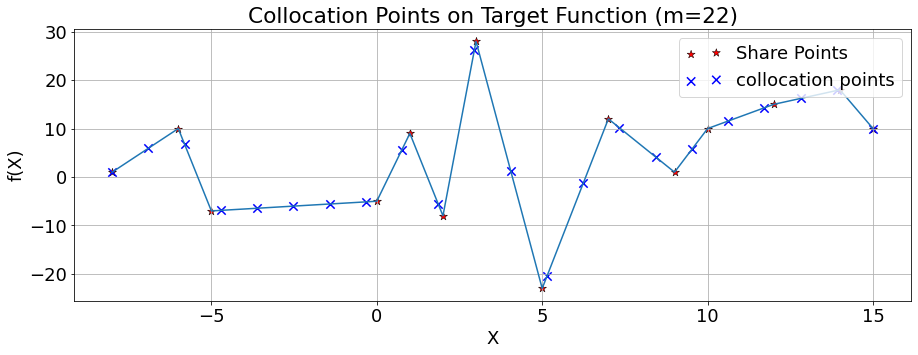

In [ ]:
'''Collocation abscissa points'''
x_min = shape_pts[0][0]
x_max = shape_pts[-1][0]
m = 22
assert m >= len(shape_pts)

u = interpolate.interp1d(x, y, kind='linear',fill_value='array-like')
x_tilde_pts = np.linspace(x_min, x_max, m)

y_new = u(x_tilde_pts)


markersize = 70


f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
plt.plot(x,y)
p1=plt.scatter(x,y,marker = '*',s=markersize,edgecolors = 'black', linewidth=.5,c = 'red')
p2 = plt.scatter(x_tilde_pts,y_new, marker='x',s=markersize,c='blue')
plt.legend([p1,p2],['Share Points','collocation points'],scatterpoints=2,loc ="upper right")
plt.xlabel('X')
plt.ylabel('f(X)')
plt.title('Collocation Points on Target Function (m='+str(m)+')')
plt.rcParams.update({'font.size': 18})
plt.grid()

In [ ]:
'''Build the basis functions collocation matrix'''




m=22
x_min = shape_pts[0][0]
x_max = shape_pts[-1][0]
wavelength = x_max - x_min
Kappa=2*(np.pi)/wavelength
x_tilde_pts = np.linspace(x_min, x_max, m)


WaveletBasis(Kappa,bunch_pts, N, sigma, shift, x_min, x_max)
A = FourierBasis(x_tilde_pts,100,Kappa)

#-------------------------------------------------------------------#

rank = np.linalg.matrix_rank(A)

if A.shape[0] > A.shape[1]:
    print('A is overdetermined.')
elif A.shape[0] < A.shape[1]:
    print('A is underdetermined.')  
else:
    print('A is determined.')

if np.linalg.matrix_rank(A) == min(A.shape):
    print('A is full rank.')
else:
    print('A is rank deficient.')




10
3


NameError: name 'FourierBasis' is not defined

In [ ]:
'''Compute optimal coefficient vector'''

'''A is full rank; solve for least squares.

||r^*||_2 =  1.257e+01 '''

f_tilde_vec = np.array(y_new)

if np.linalg.matrix_rank(A) == min(A.shape):
    print('A is full rank; solve for least squares.')
    c_tilde_star_vec = solve(A.transpose()@A, A.transpose()@f_tilde_vec)
else:
    print('A is rank deficient; solve for shortest least squares')
    c_tilde_star_vec = universal_solve(A.transpose()@A, A.transpose()@f_tilde_vec,
                                       pivot_tol=1e-6)
    
print('')
print('c_tilde_star_vec:\n')
for j,c in enumerate(c_tilde_star_vec):
    if j == 0:
        print('a_%2i = %10.3e'%(j,c))
    elif j%2 == 0:
        k = j/2
        print('b_%2i = %10.3e'%(k,c))
    else:
        k = (j+1)/2
        print('a_%2i = %10.3e'%(k,c))
        
print('')        
print('||r^*||_2 = %10.3e'%(np.linalg.norm(A@c_tilde_star_vec-f_tilde_vec)))




\begin{equation*} W_{p,k}(x) = \begin{cases} \sum\limits_p \exp{\Bigl(-\frac{(x-x_p)^2}{2\sigma^2}}\Bigr) \quad\quad \text{for} \quad\quad k = 0 \\ \exp{\Bigl(-\frac{(x-x_p)^2}{2\sigma^2}}\Bigr) \Bigl(\cos\bigl(k\,\kappa\,x + \frac{r\,x^2}{2}\bigr) + \iota\,\sin\bigl(k\,\kappa\,x + \frac{r\,x^2}{2}\bigr)\Bigr) \quad\quad \forall \quad\quad k > 0, \end{cases} \end{equation*}

In [ ]:

x_new = np.linspace(x_min, x_max, 50)
x_tilde_pts = np.arange(x_min,x_max,23/150)
print()

N = [2,1]
bunch_pts = [-3,2,7]
sigma = [0.51, 0.5,0.8]
shift = 0



W = []
for j in range(0,len(bunch_pts)):
    for i in range(0,len(x_new)):
        nume = (x_new[i]-bunch_pts[j])**2
        deno = 2*((sigma[j])**2)
        point = nume/deno
        
        w = np.exp(-point)
        w.item()
        W.append(w)
        
print(W)
plt.plot(x_tilde_pts,W,'-')

In [ ]:
print(wavelength)